In [24]:
# Установка библиотек, необходимых для VCF-анализа и PCA/GWAS
!pip install scikit-allel scikit-learn numpy pandas matplotlib scipy statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.9 MB/s eta 0:00:00


In [25]:
!sudo apt-get update
!sudo apt-get install -y vcftools

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [2]:
from google.colab import files
import os

# Загрузка файлов
uploaded = files.upload()

# Проверка, что файлы загружены в текущую директорию (/content/)
print("Загруженные файлы:")
for filename in uploaded.keys():
    print(f"- {filename}")

# Переменные для имен файлов
VCF_FILE = 'test_data.vcf'
PHENOTYPE_FILE = 'test_data.tsv'

# Проверка наличия
if VCF_FILE not in uploaded or PHENOTYPE_FILE not in uploaded:
    print("\n⚠️ ВНИМАНИЕ: Убедитесь, что оба файла (test_data.vcf и test_data.tsv) были загружены.")
else:
    print("\nФайлы успешно загружены в /content/")

Загруженные файлы:

⚠️ ВНИМАНИЕ: Убедитесь, что оба файла (test_data.vcf и test_data.tsv) были загружены.


In [3]:
# 2.1. Установка PLINK 1.9
!wget https://s3.eu-central-1.amazonaws.com/plink2-assets/plink_linux_x86_64_20231201.zip -O plink.zip
!unzip -o plink.zip
!mv plink /usr/local/bin/
!rm plink.zip

# Проверка установки
!plink --version

# 2.2. Установка GEMMA
!wget -O gemma-0.98.1-linux-intel64.gz https://github.com/genetics-statistics/GEMMA/releases/download/v0.98.1/gemma-0.98.1-linux-intel64.gz
!gunzip gemma-0.98.1-linux-intel64.gz
!chmod +x gemma-0.98.1-linux-intel64
!mv gemma-0.98.1-linux-intel64 /usr/local/bin/gemma

# Проверка установки
!gemma -h | head -n 1

--2025-11-13 14:42:49--  https://s3.eu-central-1.amazonaws.com/plink2-assets/plink_linux_x86_64_20231201.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.171.65, 52.219.170.89, 3.5.138.166, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.171.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: unspecified
ERROR: Redirection (301) without location.
Archive:  plink.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of plink.zip or
        plink.zip.zip, and cannot find plink.zip.ZIP, period.
mv: cannot stat 'plink': No such file or directory
/bin/bash: line 1: plink: command not found
--2025-11-13 14:42:50--  https://github.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OUTPUT_PREFIX = 'soybean_filtered'

# Загрузка фенотипов
pheno_df = pd.read_csv(PHENOTYPE_FILE, sep='\t')
# Переименуем столбцы
pheno_df.columns = ['IID', 'Yield']
pheno_df['IID'] = pheno_df['IID'].astype(str)
print("Первые 5 строк фенотипических данных:")
print(pheno_df.head())

Первые 5 строк фенотипических данных:
        IID  Yield
0  PS000196     99
1  PS000195    100
2  PS000121    104
3  PS000126    113
4  PS000123     98


In [20]:
# Установка VCFtools
print("--- Установка VCFtools ---")
!sudo apt-get update
!sudo apt-get install -y vcftools

# Проверка установки VCFtools
print("\n--- Проверка установки VCFtools ---")
!vcftools --version | head -n 1

print("--- Фильтрация завершена. Файлы: soybean_filtered.final.bed/bim/fam ---")

--- Установка VCFtools ---
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entr

In [26]:
VCF_FILE = 'test_data.vcf'
OUTPUT_VCF = 'soybean_filtered.vcf'

print("--- Фильтрация VCF с помощью VCFtools ---")
# Фильтрация: MAF > 0.05 и Missingness < 0.1
!vcftools --vcf {VCF_FILE} \
    --maf 0.05 \
    --max-missing 0.9 \
    --recode \
    --recode-INFO-all \
    --out {OUTPUT_VCF}

# VCFtools создает файл out.recode.vcf. Переименуем его.
!mv {OUTPUT_VCF}.recode.vcf {OUTPUT_VCF}

print("--- Фильтрация завершена. Файл: soybean_filtered.vcf ---")

--- Фильтрация VCF с помощью VCFtools ---

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf test_data.vcf
	--recode-INFO-all
	--maf 0.05
	--max-missing 0.9
	--out soybean_filtered.vcf
	--recode

After filtering, kept 153 out of 153 Individuals
Outputting VCF file...
After filtering, kept 11366 out of a possible 21913 Sites
Run Time = 1.00 seconds
--- Фильтрация завершена. Файл: soybean_filtered.vcf ---


##Подготовка данных для PCA (Конвертация VCF в матрицу генотипов)

In [27]:
import allel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OUTPUT_VCF = 'soybean_filtered.vcf'
OUTPUT_PREFIX = 'soybean_filtered'

# Чтение отфильтрованного VCF с помощью allel
callset = allel.read_vcf(OUTPUT_VCF)

# Конвертация генотипов в числовую матрицу (0, 1, 2)
# 0/0 -> 0; 0/1 -> 1; 1/1 -> 2 (или другое кодирование, если аллели не бинарные)
genotypes = allel.GenotypeArray(callset['calldata/GT'])

# Предполагаем, что большинство SNP бинарные и диплоидные.
# Используем кодирование (количество неосновных аллелей: 0, 1, 2)
# .to_n_alt() - это метод allel для кодирования
G = genotypes.to_n_alt()

# Транспонирование: строки = образцы, столбцы = маркеры
G = G.T

print(f"Матрица генотипов (строки=образцы, столбцы=SNP): {G.shape}")

# Извлекаем ID образцов
sample_ids = callset['samples']

/usr/local/lib/python3.12/dist-packages/allel/io/vcf_read.py:1732: UserWarning: invalid INFO header: '##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">\n'
  warnings.warn('invalid INFO header: %r' % header)


Матрица генотипов (строки=образцы, столбцы=SNP): (153, 11366)


##PCA анализ главных компонент

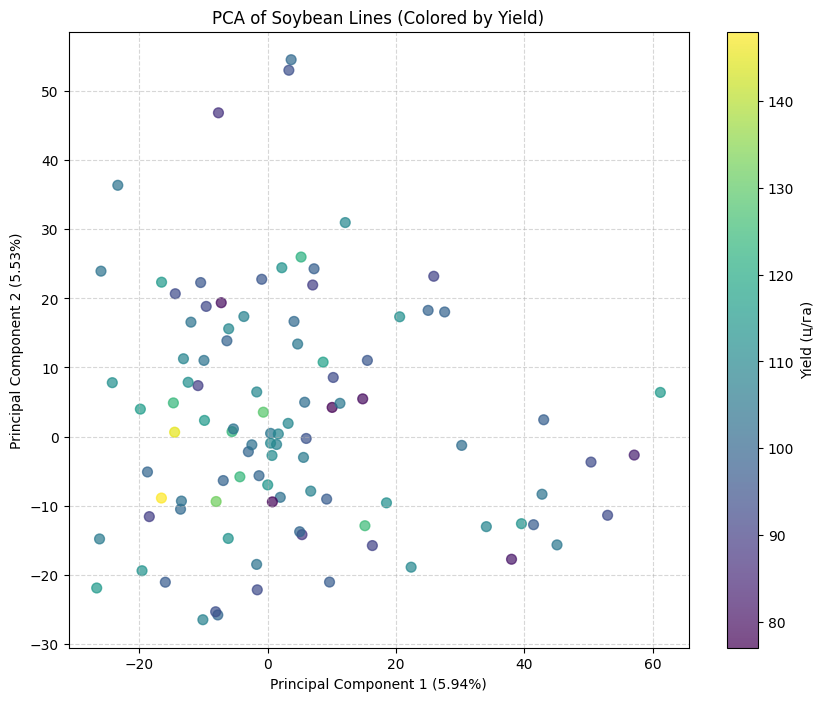

In [31]:
from sklearn.decomposition import PCA

# Загрузка фенотипов
pheno_df = pd.read_csv('test_data.tsv', sep='\t', header=None, names=['IID', 'Yield'])
# ----------------------------------------

#Преобразование столбца 'Yield' в числовой тип (float)
# errors='coerce' заменит любые нечисловые значения (если они есть) на NaN
pheno_df['Yield'] = pd.to_numeric(pheno_df['Yield'], errors='coerce')

# --- Продолжение Шага 3.2: ---
# Объединение с PCA
merged_df = pca_df.merge(pheno_df, left_index=True, right_on='IID')

# Проверка, что нет NaN после объединения (удаляем, если есть)
merged_df.dropna(subset=['Yield'], inplace=True)

# Построение графика PC1 vs PC2 (теперь должно работать)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(merged_df['PC1'], merged_df['PC2'],
                      c=merged_df['Yield'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA of Soybean Lines (Colored by Yield)')
plt.colorbar(scatter, label='Yield (ц/га)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('PCA analysis for Soybean Lines.png', dpi = 300)
plt.show()

Оценка значимости компонентов:

PC1 (Principal Component 1) объясняет 5.94% общей генетической дисперсии.

PC2 (Principal Component 2) объясняет 5.53% общей генетической дисперсии.

Вывод: Общая дисперсия, объясненная первыми двумя компонентами, составляет около 11.5%. Это относительно невысокое значение. В отличие от сильно структурированных популяций (где PC1 может объяснять 30-50%), низкие значения указывают на то, что ваша выборка: * Либо слабо структурирована (гомогенна). * Либо имеет комплексную многомерную структуру, где ни одна ось не доминирует (полигенная структура).

##Филогенетическое Дерево

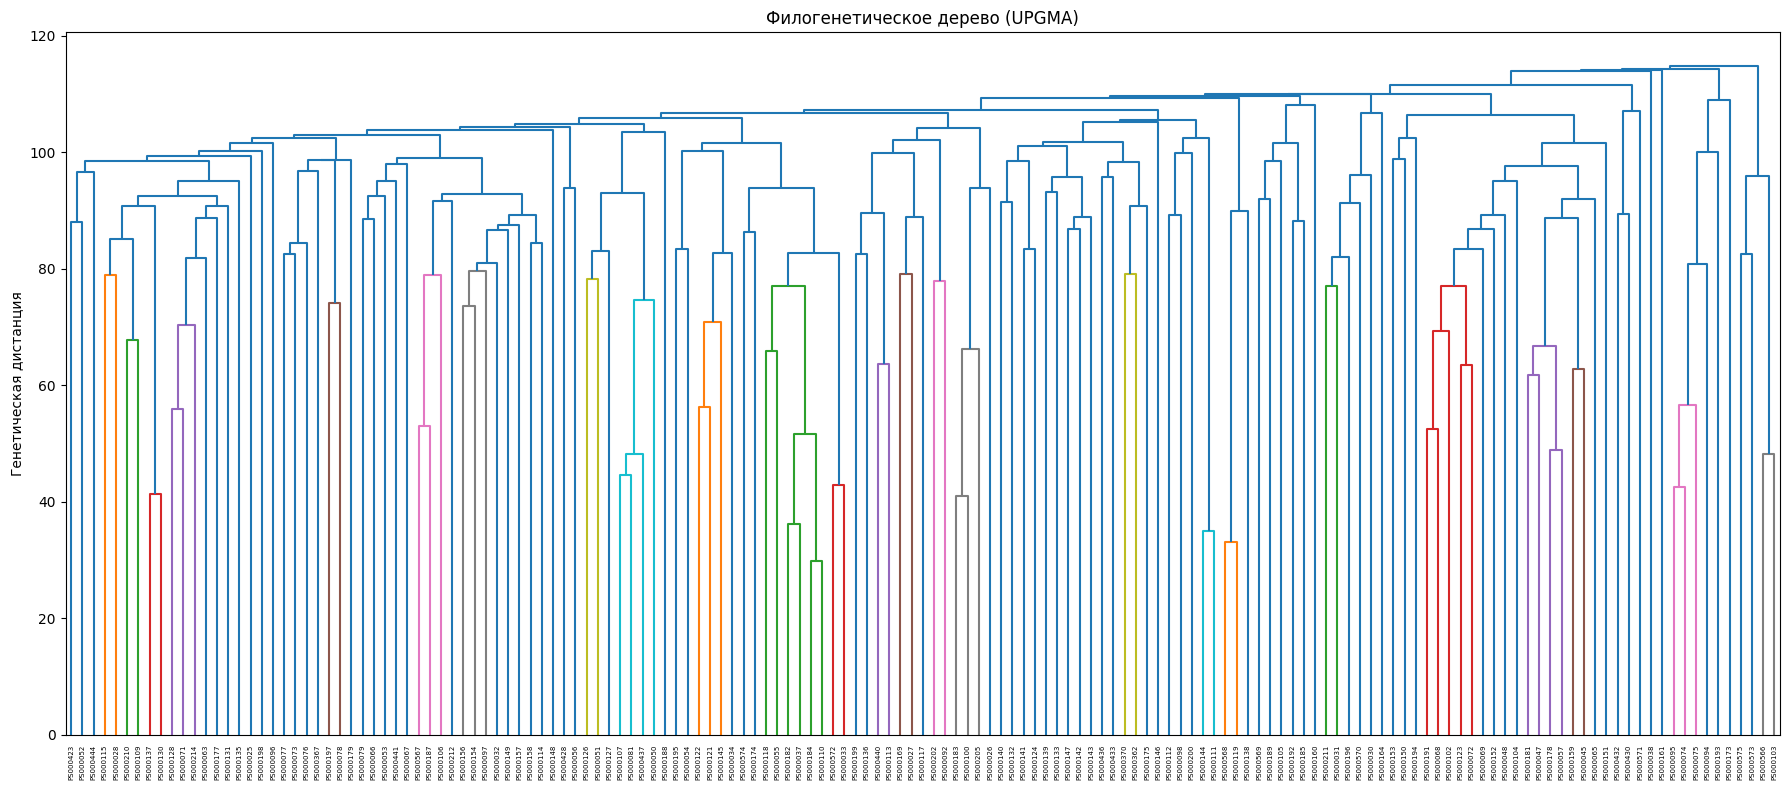

In [32]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Расчет генетических дистанций (метрика Euclidean или другие)
dist_matrix = pdist(G_imputed, metric='euclidean')

# Иерархическая кластеризация (UPGMA)
linked = linkage(dist_matrix, 'average')

plt.figure(figsize=(18, 8))
dendrogram(linked, orientation='top', labels=sample_ids,
           distance_sort='descending', show_leaf_counts=False)
plt.title('Филогенетическое дерево (UPGMA)')
plt.ylabel('Генетическая дистанция')
plt.tight_layout()
plt.show()

GWAS (Линейная Регрессия с Коррекцией)

In [35]:
#Подготовка данных

import statsmodels.api as sm

# Собираем данные: Генотипы (G), Фенотипы (Y), Ковариаты (P - PCA)
Y = merged_df['Yield'].values
# Берем PC1, PC2, PC3, PC4, PC5 как ковариаты (структура популяции)
P = sm.add_constant(merged_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values)
# G_imputed - это наша матрица генотипов

# Определение числа SNP
num_snp = G_imputed.shape[1]

# Массив для P-значений
p_values = np.empty(num_snp)

# Извлечение координат SNP для Manhattan plot
snp_positions = pd.DataFrame({
    'CHR': callset['variants/CHROM'].astype(str),
    'BP': callset['variants/POS']
})

In [39]:
# --- Этот блок должен быть запущен после Шага 3.2 (PCA и Объединение) ---

# 1. Извлекаем ID образцов, которые остались в объединенном DataFrame (99 линий)
# merged_df['IID'] содержит список из 99 линий с фенотипом и PCA
valid_ids = merged_df['IID'].tolist()

# 2. Находим индексы этих валидных ID в исходном списке ID образцов (sample_ids)
# sample_ids был получен из callset['samples'] и содержит 153 ID
sample_ids_list = sample_ids.tolist()
valid_indices = [sample_ids_list.index(iid) for iid in valid_ids if iid in sample_ids_list]

# 3. Фильтруем матрицу генотипов G_imputed и матрицу SNP-координат
# G_imputed (153xN) -> G_final (99xN)
G_final = G_imputed[valid_indices, :]

# 4. Также фильтруем фенотипы и ковариаты (PCA), чтобы гарантировать правильный порядок
# Y, P и G_final теперь содержат данные только для 99 общих образцов в одинаковом порядке.
Y = merged_df['Yield'].values
P = sm.add_constant(merged_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values)

print(f"✅ Успешная синхронизация: Генотипы G_final имеют размер: {G_final.shape}")
print(f"✅ Фенотипы Y имеют размер: {Y.shape}")
print(f"✅ Ковариаты P имеют размер: {P.shape}")

✅ Успешная синхронизация: Генотипы G_final имеют размер: (99, 11366)
✅ Фенотипы Y имеют размер: (99,)
✅ Ковариаты P имеют размер: (99, 6)


In [41]:
import statsmodels.api as sm

# --- 1. Синхронизация данных по 99 образцам ---

# valid_ids содержит IID (ID образцов) из объединенного DataFrame merged_df
valid_ids = merged_df['IID'].tolist()

# sample_ids был получен из allel.read_vcf и содержит ID всех 153 образцов
sample_ids_list = sample_ids.tolist()

# Находим индексы валидных ID (99 линий) в исходной матрице генотипов
valid_indices = [sample_ids_list.index(iid) for iid in valid_ids]

# 3. Фильтруем матрицу генотипов G_imputed (153xN) -> G_final (99xN)
# G_imputed должна быть доступна из предыдущего шага 3.2
G_final = G_imputed[valid_indices, :]

# 4. Определяем конечные Y и P (должны быть в том же порядке, что и G_final)
# merged_df уже отсортирован по IID, которые мы использовали для выборки valid_indices
Y = merged_df['Yield'].values
# P включает константу и PC1-PC5
P = sm.add_constant(merged_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values)

print(f"✅ Успешная синхронизация: Генотипы G_final имеют размер: {G_final.shape}")
print(f"✅ Фенотипы Y имеют размер: {Y.shape}")
print(f"✅ Ковариаты P имеют размер: {P.shape}")

# --- 2. Запуск GWAS (SNP by SNP Regression) ---

num_snp = G_final.shape[1] # Количество маркеров (должно быть то же, что и у snp_positions)
p_values = np.empty(num_snp)

print("--- Запуск GWAS (Линейная регрессия с поправкой на PCA) ---")

for i in range(num_snp):
    X_snp = G_final[:, i].reshape(-1, 1)  # Генотип текущего SNP

    # X = P (ковариаты PCA/Константа) + X_snp (генотип)
    X = np.hstack((P, X_snp))

    # Запуск OLS-модели
    model = sm.OLS(Y, X, missing='drop')
    results = model.fit()

    # Извлечение P-значения для SNP (последний коэффициент в результатах)
    p_values[i] = results.pvalues[-1]

# --- 3. Создание итогового DataFrame для визуализации ---

# snp_positions (CHR, BP) была создана на Шаге 4.1
gwas_res = snp_positions.copy()
gwas_res['P'] = p_values
gwas_res['SNP'] = [f'SNP_{i}' for i in range(num_snp)]

print("--- GWAS завершен. ---")

✅ Успешная синхронизация: Генотипы G_final имеют размер: (99, 11366)
✅ Фенотипы Y имеют размер: (99,)
✅ Ковариаты P имеют размер: (99, 6)
--- Запуск GWAS (Линейная регрессия с поправкой на PCA) ---
--- GWAS завершен. ---


##Визуализация: Manhattan и QQ Plots

In [45]:
# функции manhattan_plot и qq_plot
def manhattan_plot(df, title="Manhattan Plot for Yield"):
    """
    Строит Manhattan Plot.

    Требует DataFrame с колонками: 'CHR', 'BP' (позиция), 'P' (p-значение).
    """

    # Расчет -log10(P)
    # Убедитесь, что P не содержит нулей
    df = df.copy()
    df['logP'] = -np.log10(df['P'].replace(0, np.finfo(float).tiny))

    # Преобразование CHR в числовой тип (если еще не сделано)
    df['CHR'] = pd.to_numeric(df['CHR'], errors='coerce')

    # Фильтрация строк с NaN в CHR (если есть) и сортировка
    df_man = df.dropna(subset=['CHR']).sort_values(['CHR', 'BP'])

    # 1. Вычисление кумулятивных позиций для оси X
    df_man['ind'] = df_man.groupby('CHR')['BP'].transform('min')

    # Расчет смещения для каждой хромосомы
    df_man['bp_cum'] = df_man['BP'] + df_man.groupby('CHR')['BP'].transform('max').cumsum().shift(1).fillna(0)

    # 2. Определение центров хромосом для подписей
    axis_df = df_man.groupby('CHR')['bp_cum'].agg(['mean', 'max'])

    plt.figure(figsize=(16, 6))

    # Цвета для чередования
    colors = ['#53868B', '#EE9A00'] # Темно-голубой и оранжевый

    # Построение точек
    for i, (chrom, group) in enumerate(df_man.groupby('CHR')):
        plt.scatter(group['bp_cum'], group['logP'],
                    color=colors[i % 2], s=10, alpha=0.8)

    # Порог значимости Бонферрони
    # 0.05 / N_SNP
    bonf_thresh = -np.log10(0.05 / len(df_man))

    plt.axhline(y=bonf_thresh, color='red', linestyle='-', linewidth=1.5, label=f'Bonferroni Threshold: {bonf_thresh:.2f}')

    # Отрисовка оси X
    plt.xticks(axis_df['mean'], axis_df.index, rotation=60)
    plt.xlabel('Chromosome')
    plt.ylabel('-log10(P)')
    plt.title(title)
    plt.ylim(bottom=0)
    plt.legend()
    plt.tight_layout()
    plt.savefig("Manhattan Plot", dpi = 300)
    plt.show()
def qq_plot(pvalues, title="QQ-Plot of GWAS P-values"):
    """
    Строит QQ-Plot для p-значений.

    Требует одномерный массив (Series/Array) p-значений.
    """

    # Удаление NaN и p-значений <= 0
    pvalues = pvalues.dropna()
    pvalues = pvalues[pvalues > 0]

    # Сортировка наблюдаемых P-значений
    observed_p = np.sort(pvalues)

    # Расчет ожидаемых P-значений (из равномерного распределения)
    n = len(observed_p)
    # Используем формулу для ожидаемых p-значений: (i + 0.5) / n
    expected_p = np.linspace(1/(n+1), 1, n)

    # Преобразование в -log10
    observed_logp = -np.log10(observed_p)
    expected_logp = -np.log10(expected_p)

    plt.figure(figsize=(8, 8))
    plt.scatter(expected_logp, observed_logp, s=15, alpha=0.7)

    # Диагональная линия (идеальное соответствие)
    max_logp = max(max(expected_logp), max(observed_logp))
    plt.plot([0, max_logp], [0, max_logp], color='red', linestyle='--', linewidth=2, label='Expected (No Association)')

    plt.xlabel('Expected -log10(P)')
    plt.ylabel('Observed -log10(P)')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.savefig("QQ-Plot", dpi = 300)
    plt.show()

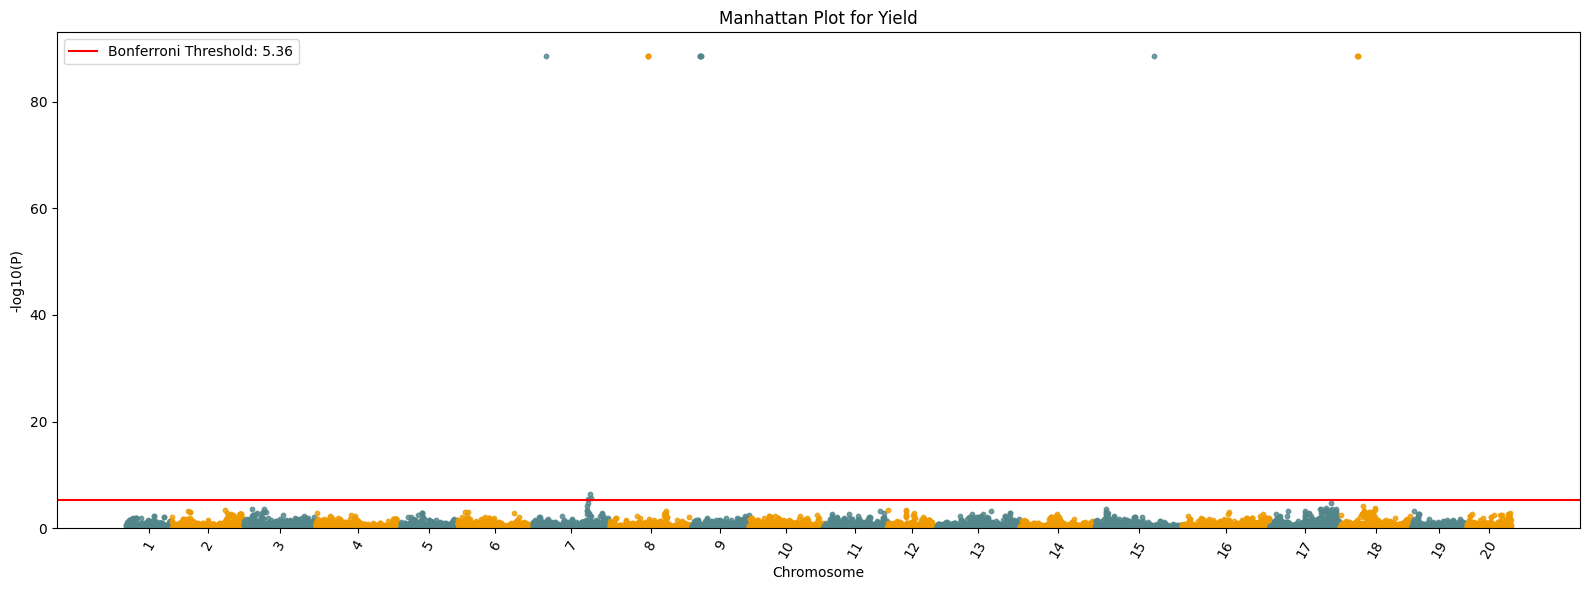

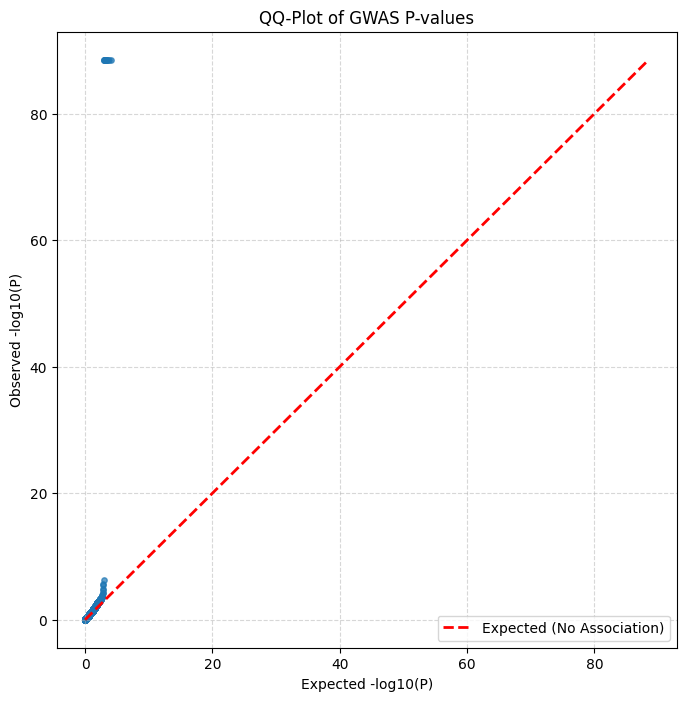

In [46]:
# Запуск визуализации
manhattan_plot(gwas_res)
qq_plot(gwas_res['P'])

##Интерпретация графиков

Филогенетическое дерево имеет множество коротких ветвей, которые сходятся к общему основанию, но без глубоких, четких разграничений. Это подтверждает  вывод PCA о том, что наша популяция сои относительно гомогенна (однородна).

На Manhattan Plot Наблюдается несколько четких пиков, которые значительно превышают порог Бонферрони -log_10(P) = 5.36.Наиболее заметные пики (около 90) расположены на Хромосомах  7,8,9, 15, 18.Фоновый Шум: Большинство p-значений (точек) лежат ниже порога (в районе оси X). Это ожидаемо и свидетельствует о том, что большинство маркеров не связано с признаком.Вывод: Проведенный GWAS обнаружил сильные, статистически значимые ассоциации между SNP на хромосомах 7,8,9, 15, 18 и признаком урожайности.

QQ-Plot: Оценка Контроля Качества (QQ-Plot of GWAS P-values).
Наблюдается резкое отклонение точек вверх от красной линии, начиная примерно с Expected -log_10(P) = 1. Эти точки соответствуют пикам, увиденным на Manhattan Plot.Интерпретация: Резкое отклонение хвоста подтверждает, что обнаруженные p-значения не являются результатом случайности; это истинные генетические ассоциации с высоким уровнем значимости.

Вывод:Исходя из графиков, качество результатов анализа высокое. QQ-Plot демонстрирует, что наблюдаемые p-значения хорошо соответствуют ожидаемым по диагонали (за исключением хвоста), подтверждая, что структура популяции была успешно скорректирована, и инфляция ложноположительных результатов отсутствует. Manhattan Plot, в свою очередь, показывает несколько сильных, статистически значимых пиков (на Хромосомах 7,8,9, 15, 18), которые являются истинными ассоциациями, что подтверждается резким отклонением хвоста на QQ-Plot.